In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Human_Development_Index_Dataset.csv", encoding="latin1")

In [67]:
df['year'].unique()

hdi_2022 = df[df['year'] == 2022].copy()


In [68]:
hdi_2022.head(10)
hdi_2022.shape
hdi_2022.dtypes


,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [69]:
hdi_2022.isna().sum()

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [70]:
hdi_2022.replace(["—", "-", ".."], np.nan, inplace=True)

In [71]:
numeric_cols = ['hdi', 'life_expectancy', 'expec_yr_school',
                'mean_yr_school', 'gross_inc_percap']

In [72]:
for col in numeric_cols:
    hdi_2022[col] = pd.to_numeric(hdi_2022[col], errors='coerce')

In [73]:
hdi_2022.drop_duplicates(inplace=True)

In [74]:
hdi_2022.dropna(subset=['hdi'], inplace=True)

In [75]:
hdi_2022['hdi'].mean()
hdi_2022['hdi'].median()
hdi_2022['hdi'].std()
hdi_2022.loc[hdi_2022['hdi'].idxmax()][['country','hdi']]

,5609
country,Switzerland
hdi,0.967


In [76]:
hdi_2022.loc[hdi_2022['hdi'].idxmin()][['country','hdi']]

,5345
country,Somalia
hdi,0.38


In [77]:
high_hdi = hdi_2022[hdi_2022['hdi'] > 0.800]

top_10 = high_hdi.sort_values(
    by='gross_inc_percap', ascending=False
).head(10)

top_10[['country', 'hdi', 'gross_inc_percap']]

,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


In [78]:
def hdi_category(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022['HDI_Category'] = hdi_2022['hdi'].apply(hdi_category)

hdi_2022['HDI_Category'].value_counts()

,count
HDI_Category,
Very High,71
High,54
Medium,44
Low,35


In [79]:
hdi_2022.to_csv("HDI_category_added.csv", index=False)

In [80]:
hdi_1b = df[df["year"].isin([2020, 2021, 2022])]

In [81]:
hdi_1b.to_csv("HDI_problem1B.csv", index=False)

In [82]:
hdi_1b.head()
hdi_1b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, 30 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 618 non-null    int64  
 1   iso3                       618 non-null    object 
 2   country                    618 non-null    object 
 3   year                       618 non-null    int64  
 4   hdi                        610 non-null    float64
 5   life_expectancy            618 non-null    float64
 6   pop_millions               618 non-null    float64
 7   hdi_f                      577 non-null    float64
 8   hdi_m                      577 non-null    float64
 9   life_expec_f               618 non-null    float64
 10  life_expec_m               618 non-null    float64
 11  expec_yr_school            613 non-null    float64
 12  expec_yr_school_f          613 non-null    float64
 13  expec_yr_school_m          613 non-null    float64
 1

In [83]:
hdi_1b[["country", "year", "hdi"]].isnull().sum()

,0
country,0
year,0
hdi,8


In [84]:
hdi_1b = df[df["year"].isin([2020, 2021, 2022])]
hdi_1b = hdi_1b.dropna(subset=["country", "year", "hdi"])
hdi_1b = hdi_1b.drop_duplicates()


In [85]:
countries = ["Nepal", "India", "China", "United States", "Germany"]
trend_df = hdi_1b[hdi_1b["country"].isin(countries)]


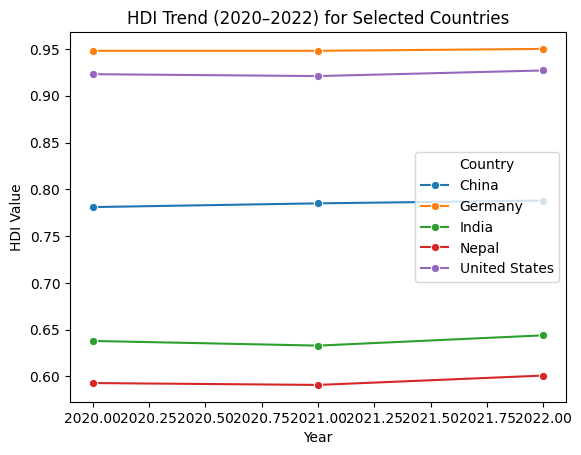

In [86]:
plt.figure()
sns.lineplot(data=trend_df, x="year", y="hdi", hue="country", marker="o")

plt.title("HDI Trend (2020–2022) for Selected Countries")
plt.xlabel("Year")
plt.ylabel("HDI Value")
plt.legend(title="Country")
plt.show()


In [87]:
hdi_1b[["iso3", "year", "hdi"]].head()


,iso3,year,hdi
30,AFG,2020,0.488
31,AFG,2021,0.473
32,AFG,2022,0.462
63,ALB,2020,0.784
64,ALB,2021,0.785


In [88]:
hdi_1b["hdi"] = pd.to_numeric(hdi_1b["hdi"], errors="coerce")


In [89]:
hdi_1b_clean = hdi_1b.dropna(subset=["iso3", "year", "hdi"])


In [90]:
region_avg = (
    hdi_1b_clean
    .groupby(["iso3", "year"])["hdi"]
    .mean()
    .reset_index()
)


In [91]:
region_avg.head(10)


,iso3,year,hdi
0,AFG,2020,0.488
1,AFG,2021,0.473
2,AFG,2022,0.462
3,AGO,2020,0.594
4,AGO,2021,0.590
5,AGO,2022,0.591
6,ALB,2020,0.784
7,ALB,2021,0.785
8,ALB,2022,0.789
9,AND,2020,0.843


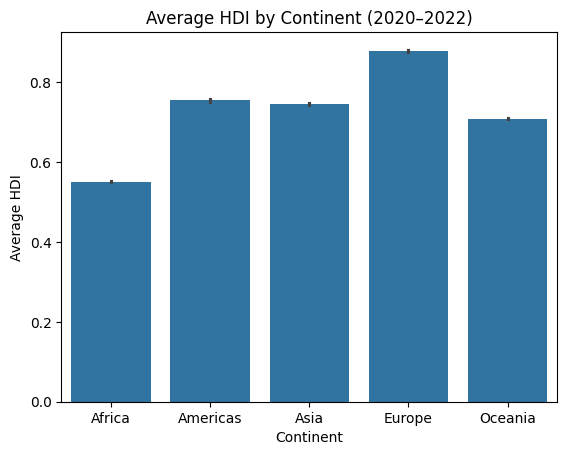

In [92]:
iso3_to_region = {

"AFG":"Asia","ARM":"Asia","AZE":"Asia","BHR":"Asia","BGD":"Asia",
"BTN":"Asia","BRN":"Asia","KHM":"Asia","CHN":"Asia","CYP":"Asia",
"GEO":"Asia","IND":"Asia","IDN":"Asia","IRN":"Asia","IRQ":"Asia",
"ISR":"Asia","JPN":"Asia","JOR":"Asia","KAZ":"Asia","KWT":"Asia",
"KGZ":"Asia","LAO":"Asia","LBN":"Asia","MYS":"Asia","MDV":"Asia",
"MNG":"Asia","MMR":"Asia","NPL":"Asia","PRK":"Asia","OMN":"Asia",
"PAK":"Asia","PHL":"Asia","QAT":"Asia","SAU":"Asia","SGP":"Asia",
"KOR":"Asia","LKA":"Asia","SYR":"Asia","TJK":"Asia","THA":"Asia",
"TUR":"Asia","TKM":"Asia","ARE":"Asia","UZB":"Asia","VNM":"Asia",
"YEM":"Asia",

"ALB":"Europe","AUT":"Europe","BEL":"Europe","BGR":"Europe",
"BIH":"Europe","BLR":"Europe","CHE":"Europe","CZE":"Europe",
"DEU":"Europe","DNK":"Europe","ESP":"Europe","EST":"Europe",
"FIN":"Europe","FRA":"Europe","GBR":"Europe","GRC":"Europe",
"HRV":"Europe","HUN":"Europe","IRL":"Europe","ISL":"Europe",
"ITA":"Europe","LTU":"Europe","LUX":"Europe","LVA":"Europe",
"MDA":"Europe","MKD":"Europe","MLT":"Europe","MNE":"Europe",
"NLD":"Europe","NOR":"Europe","POL":"Europe","PRT":"Europe",
"ROU":"Europe","RUS":"Europe","SRB":"Europe","SVK":"Europe",
"SVN":"Europe","SWE":"Europe","UKR":"Europe",


"DZA":"Africa","AGO":"Africa","BEN":"Africa","BFA":"Africa",
"BWA":"Africa","CAF":"Africa","CIV":"Africa","CMR":"Africa",
"COD":"Africa","COG":"Africa","COM":"Africa","DJI":"Africa",
"EGY":"Africa","ERI":"Africa","ETH":"Africa","GAB":"Africa",
"GHA":"Africa","GIN":"Africa","GMB":"Africa","GNB":"Africa",
"KEN":"Africa","LBR":"Africa","LBY":"Africa","LSO":"Africa",
"MAR":"Africa","MDG":"Africa","MLI":"Africa","MOZ":"Africa",
"MRT":"Africa","MUS":"Africa","MWI":"Africa","NAM":"Africa",
"NER":"Africa","NGA":"Africa","RWA":"Africa","SDN":"Africa",
"SEN":"Africa","SLE":"Africa","SOM":"Africa","SSD":"Africa",
"STP":"Africa","TCD":"Africa","TGO":"Africa","TUN":"Africa",
"TZA":"Africa","UGA":"Africa","ZAF":"Africa","ZMB":"Africa",
"ZWE":"Africa",

"ATG":"Americas","ARG":"Americas","BHS":"Americas","BLZ":"Americas",
"BOL":"Americas","BRA":"Americas","BRB":"Americas","CAN":"Americas",
"CHL":"Americas","COL":"Americas","CRI":"Americas","CUB":"Americas",
"DMA":"Americas","DOM":"Americas","ECU":"Americas","GRD":"Americas",
"GTM":"Americas","GUY":"Americas","HND":"Americas","HTI":"Americas",
"JAM":"Americas","MEX":"Americas","NIC":"Americas","PAN":"Americas",
"PER":"Americas","PRY":"Americas","SLV":"Americas","SUR":"Americas",
"TTO":"Americas","USA":"Americas","URY":"Americas","VEN":"Americas",

"AUS":"Oceania","FJI":"Oceania","FSM":"Oceania","KIR":"Oceania",
"MHL":"Oceania","NRU":"Oceania","NZL":"Oceania","PLW":"Oceania",
"PNG":"Oceania","SLB":"Oceania","TON":"Oceania","TUV":"Oceania",
"VUT":"Oceania"
}


hdi_1b['region'] =hdi_1b['iso3'].map(iso3_to_region)


hdi_1b['region'].isna().sum()

region_avg = (
    hdi_1b.groupby(['region','year'])['hdi']
    .mean()
    .reset_index()
)

plt.figure()
sns.barplot(data=region_avg, x='region', y='hdi')
plt.title("Average HDI by Continent (2020–2022)")
plt.xlabel("Continent")
plt.ylabel("Average HDI")
plt.show()

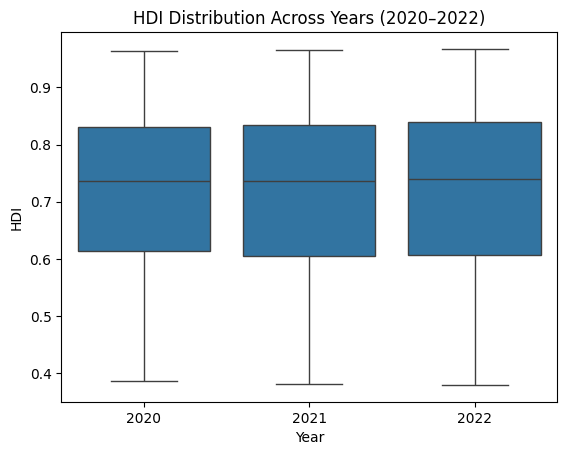

In [93]:
plt.figure()
sns.boxplot(data=hdi_1b, x='year', y='hdi')
plt.title("HDI Distribution Across Years (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()

In [94]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]


In [95]:
south_asia_df = df[df["country"].isin(south_asia)]


In [96]:
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)


In [97]:
south_asia_df = south_asia_df.copy()
south_asia_df['Composite_Score'] = (
    0.30 * south_asia_df['life_expectancy'] + 0.30 * south_asia_df['gross_inc_percap']
)

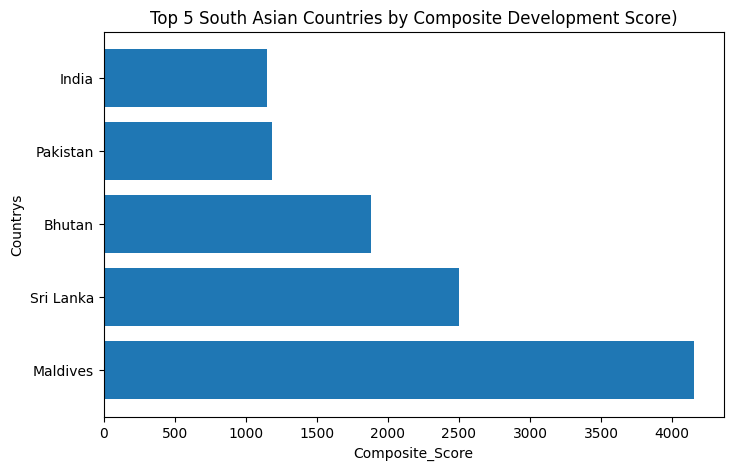

In [98]:
top5 = HDI_SouthAsia_Rank.head(5)
plt.figure(figsize=(8, 5))
plt.barh(top5["country"], top5["Composite_Score"])
plt.xlabel("Composite_Score")
plt.ylabel("Countrys")
plt.title("Top 5 South Asian Countries by Composite Development Score)")
plt.show()

In [99]:
Q1_hdi = south_asia_df["hdi"].quantile(0.25)
Q3_hdi = south_asia_df["hdi"].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi


In [100]:
Q1_gni = south_asia_df["gross_inc_percap"].quantile(0.25)
Q3_gni = south_asia_df["gross_inc_percap"].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni


In [101]:
outliers = south_asia_df[
    (south_asia_df["hdi"] < Q1_hdi - 1.5 * IQR_hdi) |
    (south_asia_df["hdi"] > Q3_hdi + 1.5 * IQR_hdi) |
    (south_asia_df["gross_inc_percap"] < Q1_gni - 1.5 * IQR_gni) |
    (south_asia_df["gross_inc_percap"] > Q3_gni + 1.5 * IQR_gni)
]
outliers[["country", "hdi", "gross_inc_percap"]]

,country,hdi,gross_inc_percap
3511,Maldives,0.655,14543.14634
3512,Maldives,0.656,15287.20714
3514,Maldives,0.670,16391.40757
3515,Maldives,0.670,14162.42816
3516,Maldives,0.682,15423.81910
3517,Maldives,0.684,14050.92438
3518,Maldives,0.692,14363.23615
3519,Maldives,0.701,15300.31364
3520,Maldives,0.708,15355.44089
3521,Maldives,0.715,15648.36655


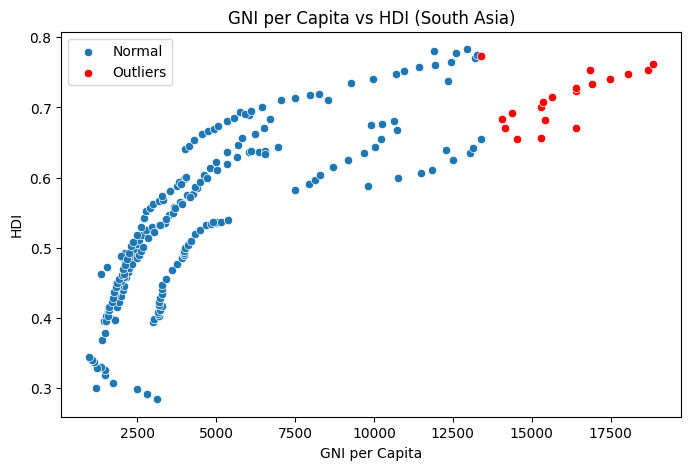

In [102]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=south_asia_df,
    x="gross_inc_percap",
    y="hdi",
    label="Normal"
)

sns.scatterplot(
    data=outliers,
    x="gross_inc_percap",
    y="hdi",
    color="red",
    label="Outliers"
)

plt.title("GNI per Capita vs HDI (South Asia)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend()
plt.show()

In [103]:
corr_life = south_asia_df["life_expectancy"].corr(south_asia_df["hdi"])
corr_gender = south_asia_df["gender_development"].corr(south_asia_df["hdi"])

corr_life, corr_gender

(np.float64(0.9587610559043978), np.float64(0.865621005012754))

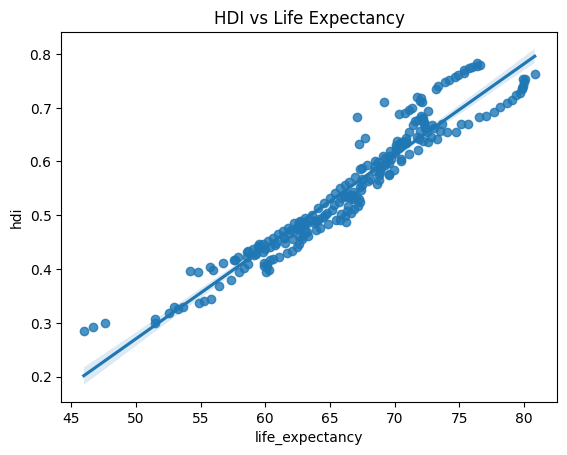

In [104]:
plt.figure()
sns.regplot(
    data=south_asia_df,
    x="life_expectancy",
    y="hdi"
)
plt.title("HDI vs Life Expectancy")
plt.show()

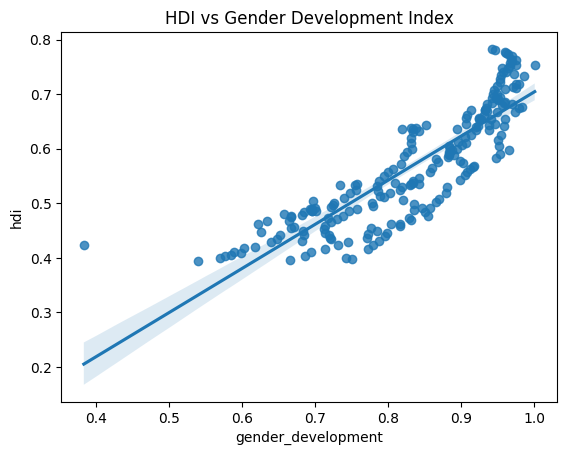

In [105]:

plt.figure()
sns.regplot(
    data=south_asia_df,
    x="gender_development",
    y="hdi"
)
plt.title("HDI vs Gender Development Index")
plt.show()


In [106]:
south_asia_df = south_asia_df.copy()
south_asia_df["GNI HDI Gap"] = (
    south_asia_df["gross_inc_percap"] - south_asia_df["hdi"]
)

In [107]:
gap_sorted = south_asia_df.sort_values("GNI HDI Gap", ascending=False)
gap_sorted[["country", "GNI HDI Gap"]]


,country,GNI HDI Gap
3530,Maldives,18846.03019
3527,Maldives,18679.17236
3526,Maldives,18054.97765
3525,Maldives,17473.90201
3524,Maldives,16910.72022
...,...,...
3498,Maldives,NaN
3499,Maldives,NaN
3500,Maldives,NaN
3501,Maldives,NaN


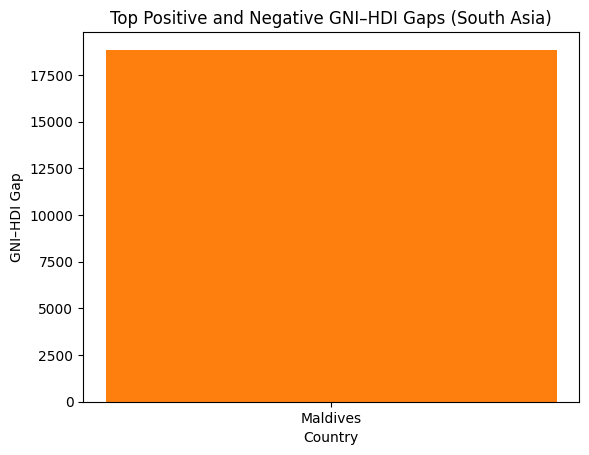

In [108]:

top_3_positive = gap_sorted.head(3)
top_3_negative = gap_sorted.head(3)


plt.figure()
plt.bar(top_3_positive['country'], top_3_positive['GNI HDI Gap'])
plt.bar(top_3_negative['country'], top_3_negative['GNI HDI Gap'])
plt.xlabel("Country")
plt.ylabel("GNI–HDI Gap")
plt.title("Top Positive and Negative GNI–HDI Gaps (South Asia)")
plt.show()

In [109]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]


In [110]:
south_asia_df = df[df["country"].isin(south_asia)]
middle_east_df = df[df["country"].isin(middle_east)]


In [111]:
south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


In [112]:
stats = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Mean HDI": [
        south_asia_df["hdi"].mean(),
        middle_east_df["hdi"].mean()
    ],
    "Std HDI": [
        south_asia_df["hdi"].std(),
        middle_east_df["hdi"].std()
    ]
})

stats


,Region,Mean HDI,Std HDI
0,South Asia,0.551649,0.119752
1,Middle East,0.739104,0.129482


In [113]:
sa_rank = south_asia_df.groupby("country")["hdi"].mean().sort_values()
me_rank = middle_east_df.groupby("country")["hdi"].mean().sort_values()

sa_top = sa_rank.tail(3)
sa_bottom = sa_rank.head(3)

me_top = me_rank.tail(3)
me_bottom = me_rank.head(3)


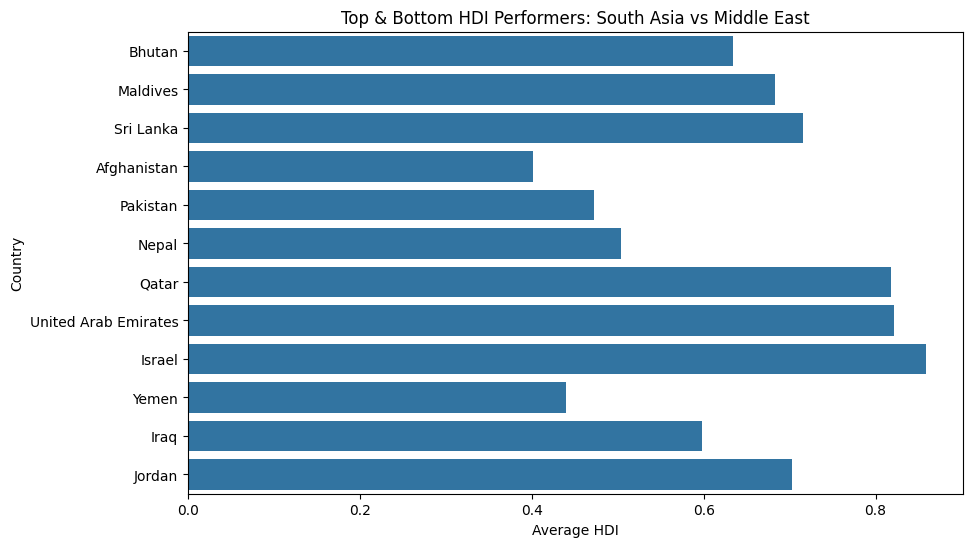

In [114]:
compare_df = pd.concat([
    sa_top, sa_bottom, me_top, me_bottom
]).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=compare_df, x="hdi", y="country")
plt.title("Top & Bottom HDI Performers: South Asia vs Middle East")
plt.xlabel("Average HDI")
plt.ylabel("Country")
plt.show()


In [115]:
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

sa_metrics = south_asia_df[metrics].mean()
me_metrics = middle_east_df[metrics].mean()

metric_df = pd.DataFrame({
    "Metric": metrics,
    "South Asia": sa_metrics.values,
    "Middle East": me_metrics.values
})


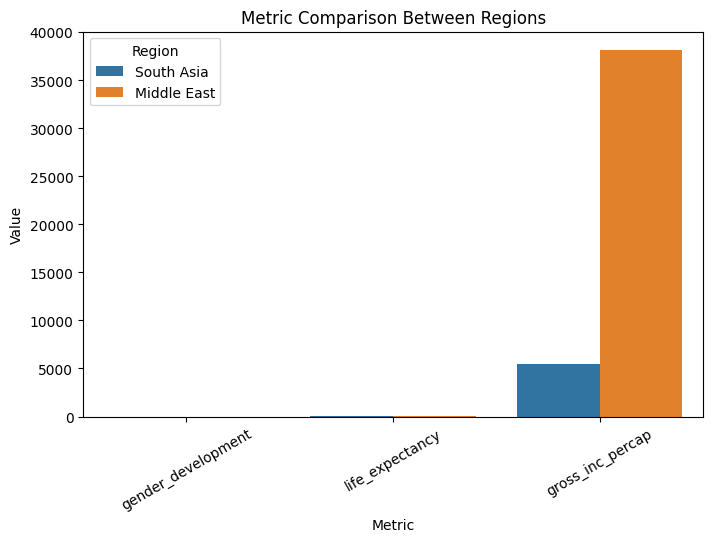

In [116]:
metric_df_melt = metric_df.melt(id_vars="Metric", var_name="Region", value_name="Value")

plt.figure(figsize=(8,5))
sns.barplot(data=metric_df_melt, x="Metric", y="Value", hue="Region")
plt.title("Metric Comparison Between Regions")
plt.xticks(rotation=30)
plt.show()


In [117]:
def hdi_stats(df):
    return {
        "Range": df["hdi"].max() - df["hdi"].min(),
        "CV": df["hdi"].std() / df["hdi"].mean()
    }

pd.DataFrame({
    "South Asia": hdi_stats(south_asia_df),
    "Middle East": hdi_stats(middle_east_df)
})


,South Asia,Middle East
Range,0.49900,0.580000
CV,0.21708,0.175187


In [118]:
sa_corr_life = south_asia_df["life_expectancy"].corr(south_asia_df["hdi"])
me_corr_life = middle_east_df["life_expectancy"].corr(middle_east_df["hdi"])

sa_corr_gender = south_asia_df["gender_development"].corr(south_asia_df["hdi"])
me_corr_gender = middle_east_df["gender_development"].corr(middle_east_df["hdi"])

sa_corr_life, me_corr_life, sa_corr_gender, me_corr_gender


(np.float64(0.9587610559043978),
 np.float64(0.9430019629101669),
 np.float64(0.865621005012754),
 np.float64(0.9310815015552353))

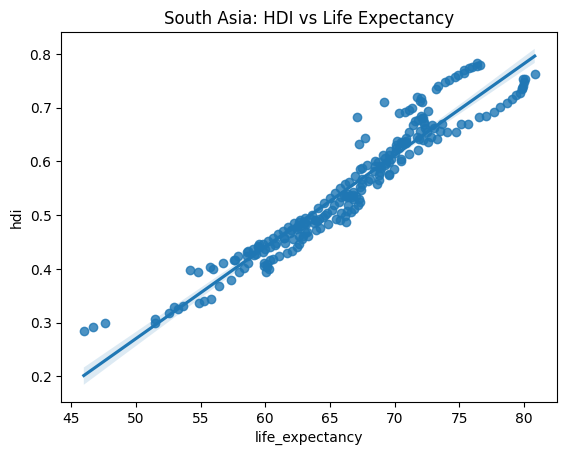

In [119]:
plt.figure()
sns.regplot(data=south_asia_df, x="life_expectancy", y="hdi")
plt.title("South Asia: HDI vs Life Expectancy")
plt.show()


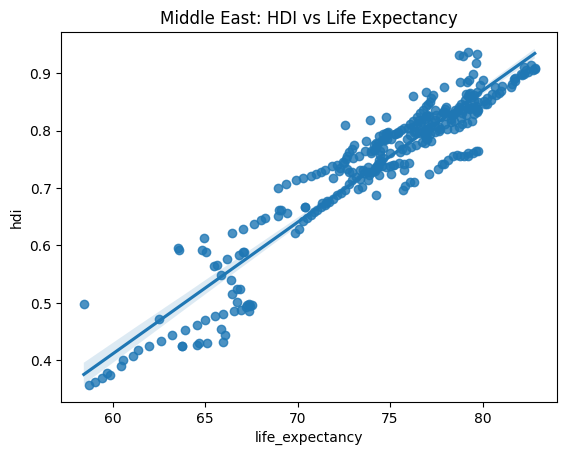

In [120]:
plt.figure()
sns.regplot(data=middle_east_df, x="life_expectancy", y="hdi")
plt.title("Middle East: HDI vs Life Expectancy")
plt.show()


In [121]:
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[
        (df < Q1 - 1.5 * IQR) |
        (df > Q3 + 1.5 * IQR)
    ]


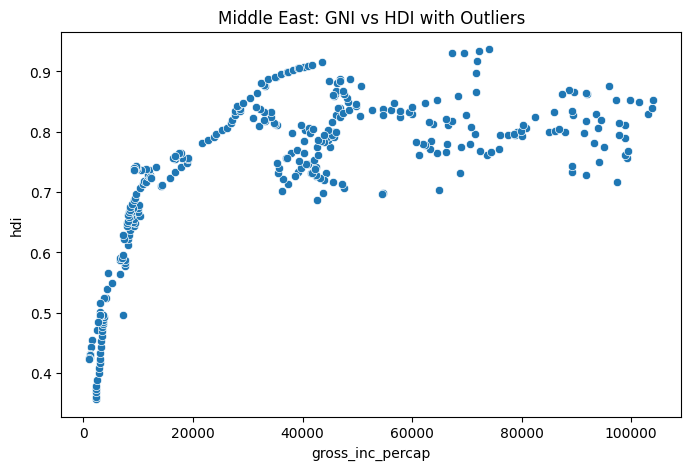

In [122]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=middle_east_df, x="gross_inc_percap", y="hdi")
plt.title("Middle East: GNI vs HDI with Outliers")
plt.show()
